In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
df = pd.read_csv("20220327 annual-number-of-deaths-by-cause.csv")
df.head(10)

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
5,Afghanistan,AFG,2013,2,2281.0,18015.0,460.0,143.0,1777.0,4379.0,...,1651.0,3709.0,55274.0,4945.0,6859.0,3413.0,6476.0,2204.0,1581.0,491.0
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,1579.0,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,1469.0,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,1416.0,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0
9,Afghanistan,AFG,1990,NaN,2159.0,11580.0,323.0,93.0,1370.0,1538.0,...,2054.0,12.0,44899.0,3709.0,5945.0,2673.0,5005.0,2985.0,1116.0,371.0


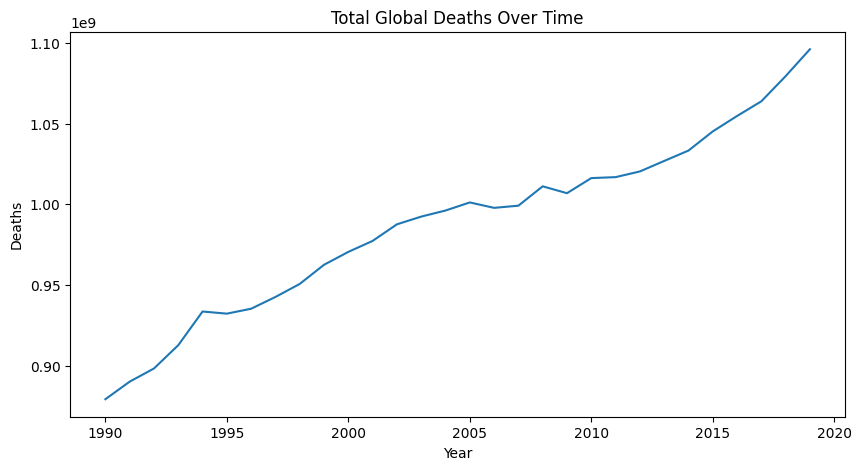

In [ ]:
# 1 The trend of total deaths over time (all entities combined)

df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
# Get rids of first 3 column and converts to Nan for error values

df['Total_Deaths'] = df.filter(like="Deaths").sum(axis=1)
# THis filters the Columns with column name Death and sums it up

# This group by year and plot
df.groupby('Year')['Total_Deaths'].sum().plot(
    kind='line', figsize=(10,5), title="Total Global Deaths Over Time"
)
plt.ylabel("Deaths")
plt.show()

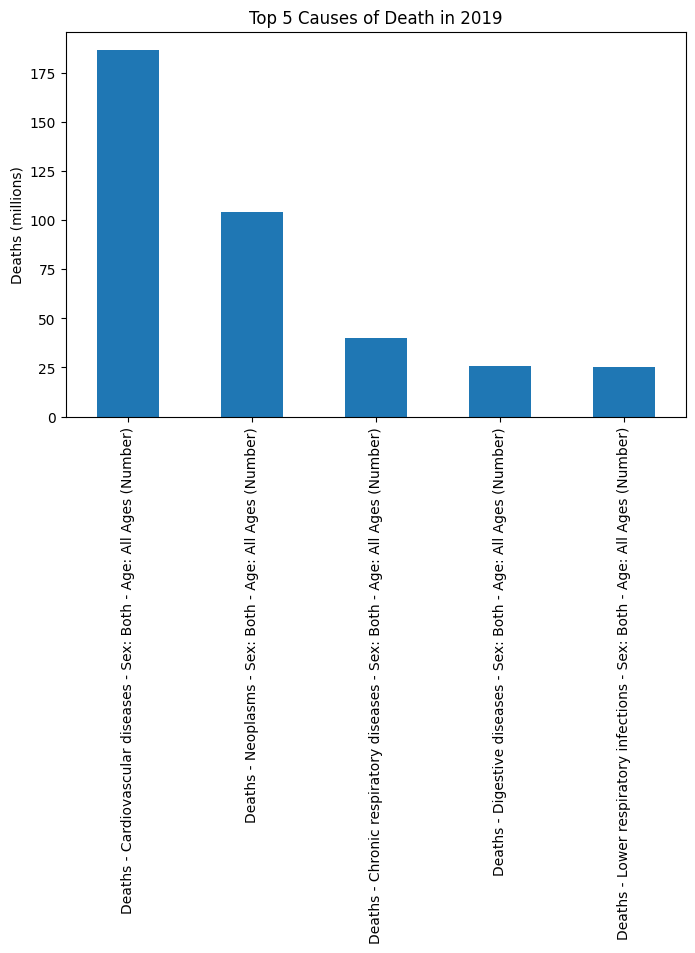

In [ ]:
#2 The Top 5 Causes of Death in 2019

# This loops through each column to check for Deaths
death_cols = [column for column in df.columns if column.startswith("Deaths")]
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]

# This sums up the top 5 causes of deaths
cause_totals = df_latest[death_cols].sum().sort_values(ascending=False).head(5)

# Converting deaths to millions
cause_totals_millions = cause_totals / 1_000_000

# Plot the graph
cause_totals_millions.plot(kind='bar', figsize=(8,5), title=f"Top 5 Causes of Death in {latest_year}")
plt.ylabel("Deaths (millions)")
plt.show()


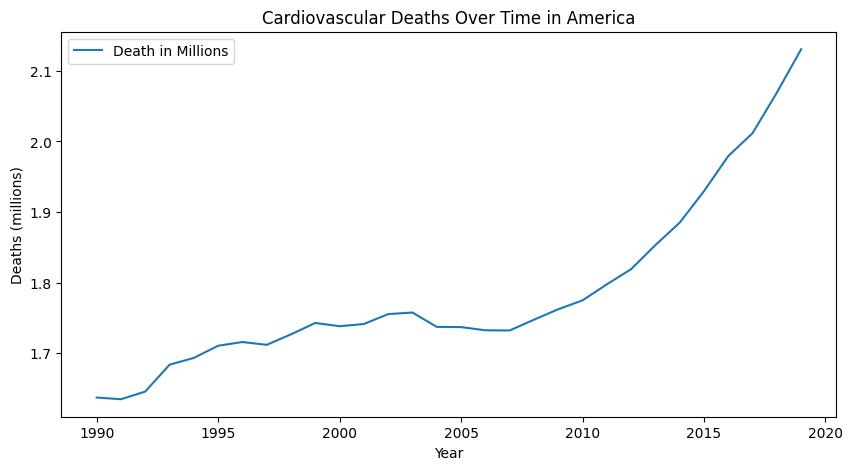

In [ ]:
# 3 Cardiovascular Deaths Over Time in America

country = 'America'

df_country = df[df['Entity'] == country]

# Groupby Year and sums up deaths in cardiovascular diseases 
df_country = (
    df_country.groupby('Year')['Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)']
    .sum()
    .reset_index(name='Death in Millions')
)
df_country['Death in Millions'] /= 1_000_000

# This plots the graph 
df_country.plot(
    x='Year', y='Death in Millions',
    kind='line', figsize=(10,5),
    title=f"Cardiovascular Deaths Over Time in {country}"
)
plt.ylabel("Deaths (millions)")
plt.show()


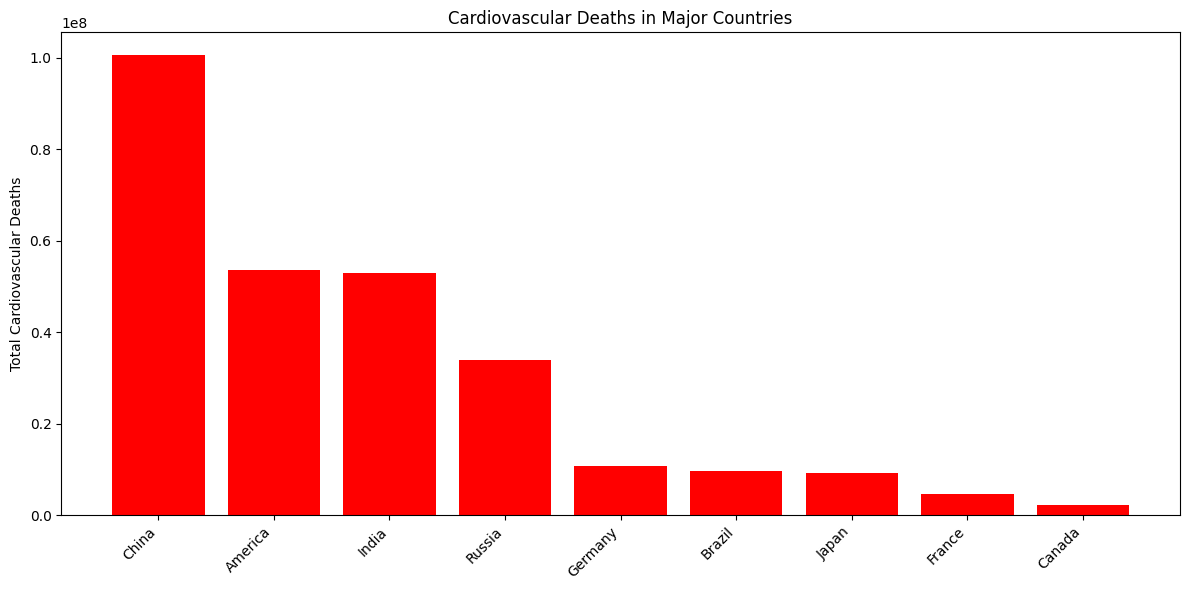

In [41]:
# 4 Cardiovascular Deaths in Major Countries

# This column name for cardiovascular deaths 
cardio_col = "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)"

# Made a list of main countries to compare
main_countries = ["America", "China", "India", "Russia", "Brazil", "Germany", "UK", "France", "Japan", "Canada"]

# Filter dataset to compare only the main countries
df_main = df[df["Entity"].isin(main_countries)]

# Sum up cardio deaths for all main countries
total_cardio_deaths = df_main.groupby("Entity")[cardio_col].sum()

# This sort alphabetically or by deaths
total_cardio_deaths = total_cardio_deaths.sort_values(ascending=False) 

# THis plots the chart
plt.figure(figsize=(12,6))
plt.bar(total_cardio_deaths.index, total_cardio_deaths.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Cardiovascular Deaths")
plt.title("Cardiovascular Deaths in Major Countries")
plt.tight_layout()
plt.show()


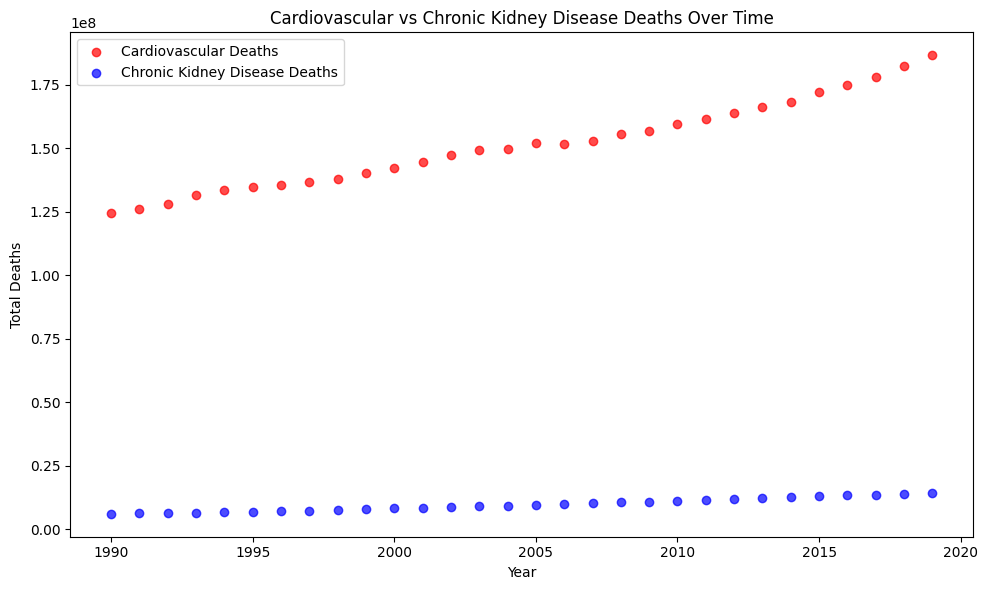

In [ ]:
#5 Cardiovascular Diseases VS Chronic Kidney Diseases

# This gets the cardiovascular and kidney diseases
cardio_col = "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)"
kidney_col = "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)"

# Grouping it by year together
yearly_deaths = df.groupby("Year")[[cardio_col, kidney_col]].sum()

# Plots the graphh
plt.figure(figsize=(10,6))

plt.scatter(yearly_deaths.index, yearly_deaths[cardio_col], 
            color="red", alpha=0.7, label="Cardiovascular Deaths")

plt.scatter(yearly_deaths.index, yearly_deaths[kidney_col], 
            color="blue", alpha=0.7, label="Chronic Kidney Disease Deaths")

plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Cardiovascular vs Chronic Kidney Disease Deaths Over Time")
plt.legend()
plt.tight_layout()
plt.show()

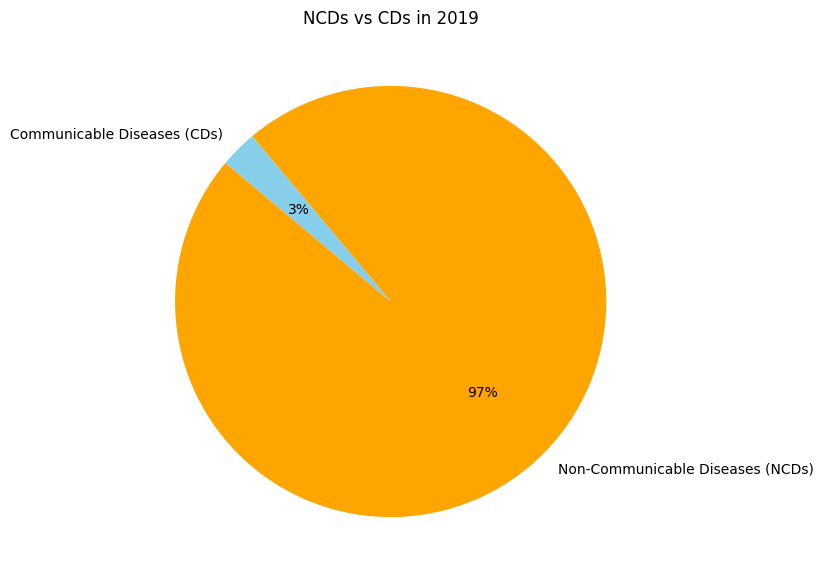

In [ ]:
#6 Noncommunicable vs Communicable diseases

# Chooses the year 2019 
year = 2019
df_year = df[df["Year"] == year]

# Grouping the deaths to communicable and noncommunicable columns
communicable_cols = [
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)"
]

noncommunicable_cols = [
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"
]

# Just summing up the diseases
communicable_total = df_year[communicable_cols].sum().sum()
noncommunicable_total = df_year[noncommunicable_cols].sum().sum()

# Data for pie chart
data = {
    "Non-Communicable Diseases (NCDs)": noncommunicable_total,
    "Communicable Diseases (CDs)": communicable_total
}

# Colors for the plot
colors = ["orange", "skyblue"]

# Ploting the graph
plt.figure(figsize=(7,7))
plt.pie(data.values(), labels=data.keys(),
        colors=colors, autopct='%1.0f%%', startangle=140)

plt.title(f"NCDs vs CDs in {year}")
plt.show()


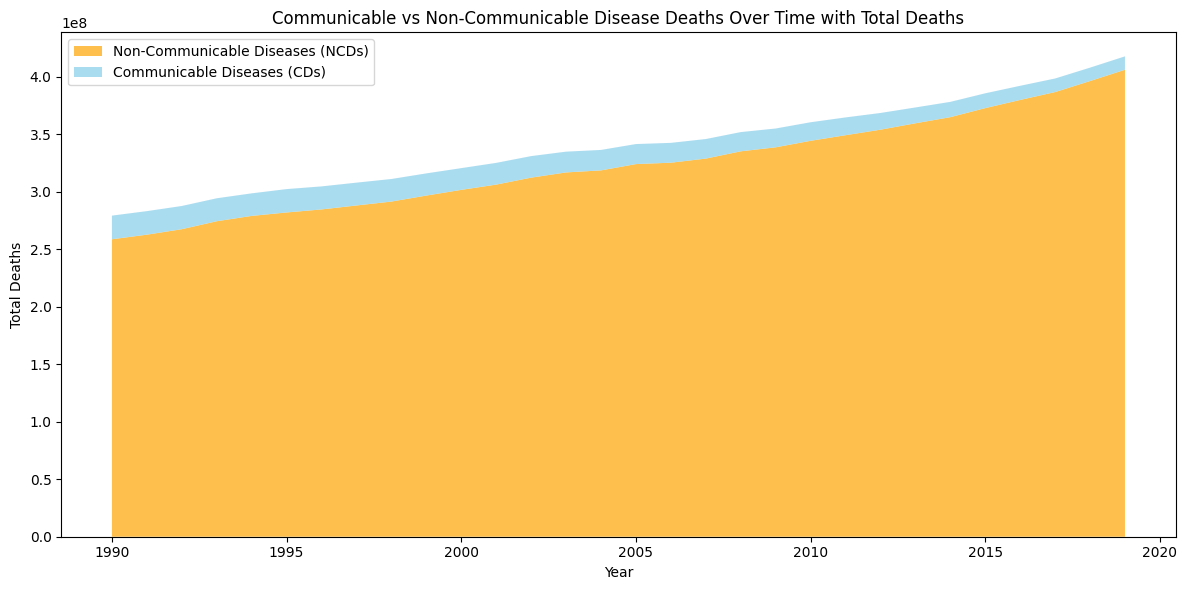

In [20]:
#7 NonCD vs CD deaths each year

# Columns for CD and NCD
communicable_cols = [
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)"
]

noncommunicable_cols = [
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"
]

# Group by year and sum across all columns
yearly_totals = df.groupby("Year")[communicable_cols + noncommunicable_cols].sum()
yearly_totals["CDs"] = yearly_totals[communicable_cols].sum(axis=1)
yearly_totals["NCDs"] = yearly_totals[noncommunicable_cols].sum(axis=1)
yearly_totals["Total Deaths"] = yearly_totals["CDs"] + yearly_totals["NCDs"]

# Plots the area chart
plt.figure(figsize=(12,6))
plt.stackplot(yearly_totals.index,
              yearly_totals["NCDs"],
              yearly_totals["CDs"],
              labels=["Non-Communicable Diseases (NCDs)", "Communicable Diseases (CDs)"],
              colors=["orange", "skyblue"], alpha=0.7)

plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Communicable vs Non-Communicable Disease Deaths Over Time with Total Deaths")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


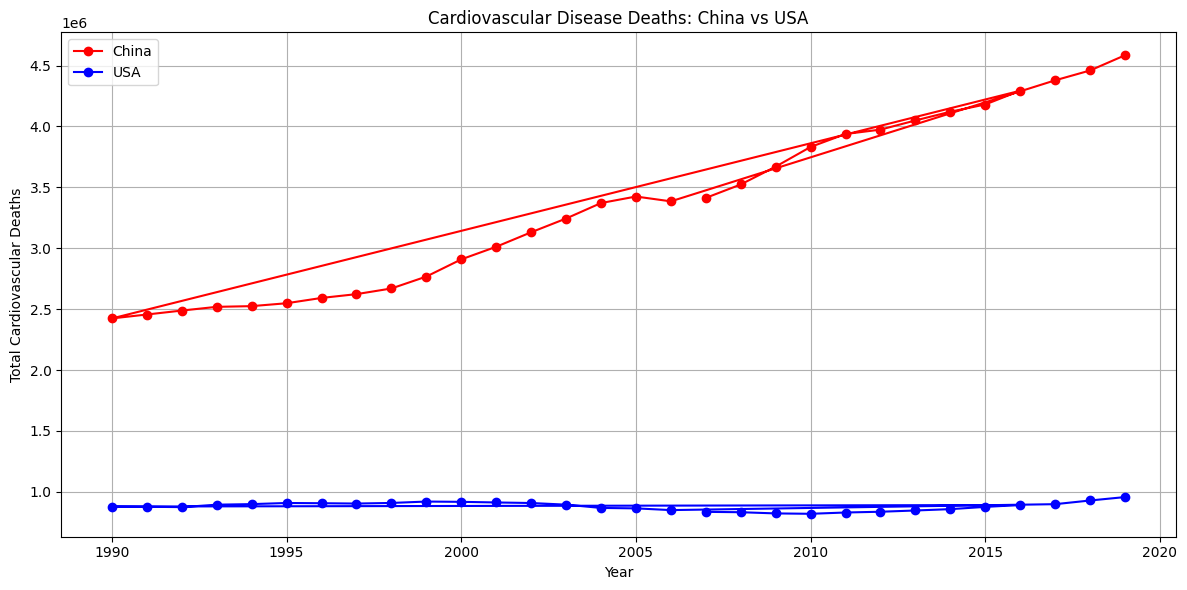

In [ ]:
#8 China Vs America Cardiovascular Deaths

# Filter data for China and US
china_data = df[df['Entity'] == 'China']
us_data = df[df['Entity'] == 'United States']

# Extract X and Y values
years = china_data['Year'].tolist()  # X-axis
china_cvd_deaths = china_data['Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)'].tolist()
us_cvd_deaths = us_data['Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)'].tolist()

# Create line graph
plt.figure(figsize=(12,6))
plt.plot(years, china_cvd_deaths, marker='o', linestyle='-', color='red', label='China')
plt.plot(years, us_cvd_deaths, marker='o', linestyle='-', color='blue', label='USA')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Cardiovascular Deaths')
plt.title('Cardiovascular Disease Deaths: China vs USA')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()


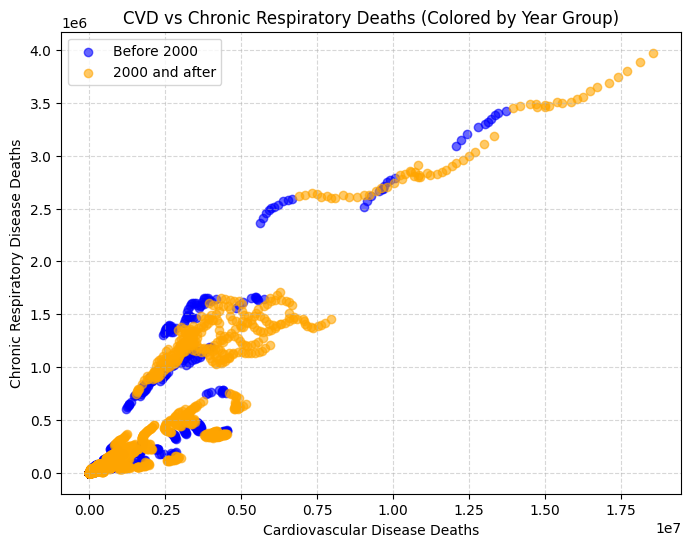

In [ ]:
#9 Cardiovascular Deaths VS Chronic Respiratory Deaths


# this picks out the columns and naming it by their column
x_col = "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)"
y_col = "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)"

# Grouping it before the 2000 and after 2000
before_2000 = df[df["Year"] < 2000]
after_2000 = df[df["Year"] >= 2000]

plt.figure(figsize=(8,6))

# This just plots the graph and colors
plt.scatter(before_2000[x_col], before_2000[y_col], 
            alpha=0.6, label="Before 2000", color="blue")

plt.scatter(after_2000[x_col], after_2000[y_col], 
            alpha=0.6, label="2000 and after", color="orange")

# This labels the graph
plt.xlabel("Cardiovascular Disease Deaths")
plt.ylabel("Chronic Respiratory Disease Deaths")
plt.title("CVD vs Chronic Respiratory Deaths (Colored by Year Group)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()





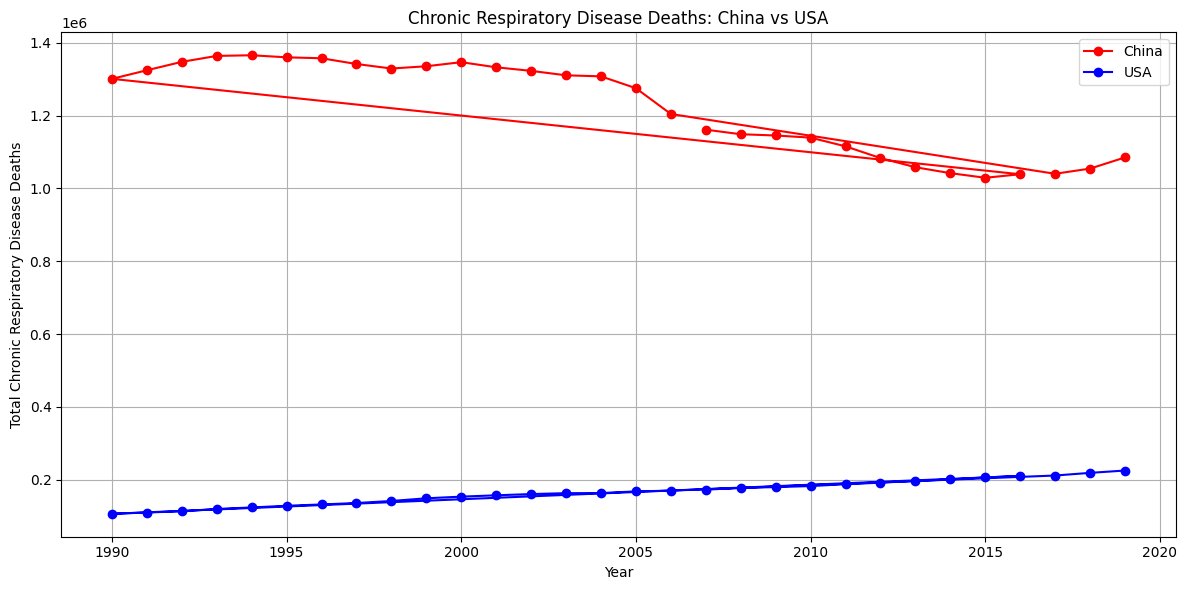

In [ ]:

# Filter data for China and US
china_data = df[df['Entity'] == 'China']
us_data = df[df['Entity'] == 'United States']

# THis extract is values 
years = china_data['Year'].tolist()  # X-axis
china_respiratory_deaths = china_data['Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)'].tolist()
us_respiratory_deaths = us_data['Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)'].tolist()

# This creates the graph and its color
plt.figure(figsize=(12,6))
plt.plot(years, china_respiratory_deaths, marker='o', linestyle='-', color='red', label='China')
plt.plot(years, us_respiratory_deaths, marker='o', linestyle='-', color='blue', label='USA')

# Labels the graph 
plt.xlabel('Year')
plt.ylabel('Total Chronic Respiratory Disease Deaths')
plt.title('Chronic Respiratory Disease Deaths: China vs USA')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()
